In [1]:
import numpy as np
import itertools 
import ezc3d
import matplotlib.pyplot as plt
from pathlib import Path
from math import sqrt
from tqdm import tqdm

# Wyświetlenie surowych danych EMG z pliku C3D

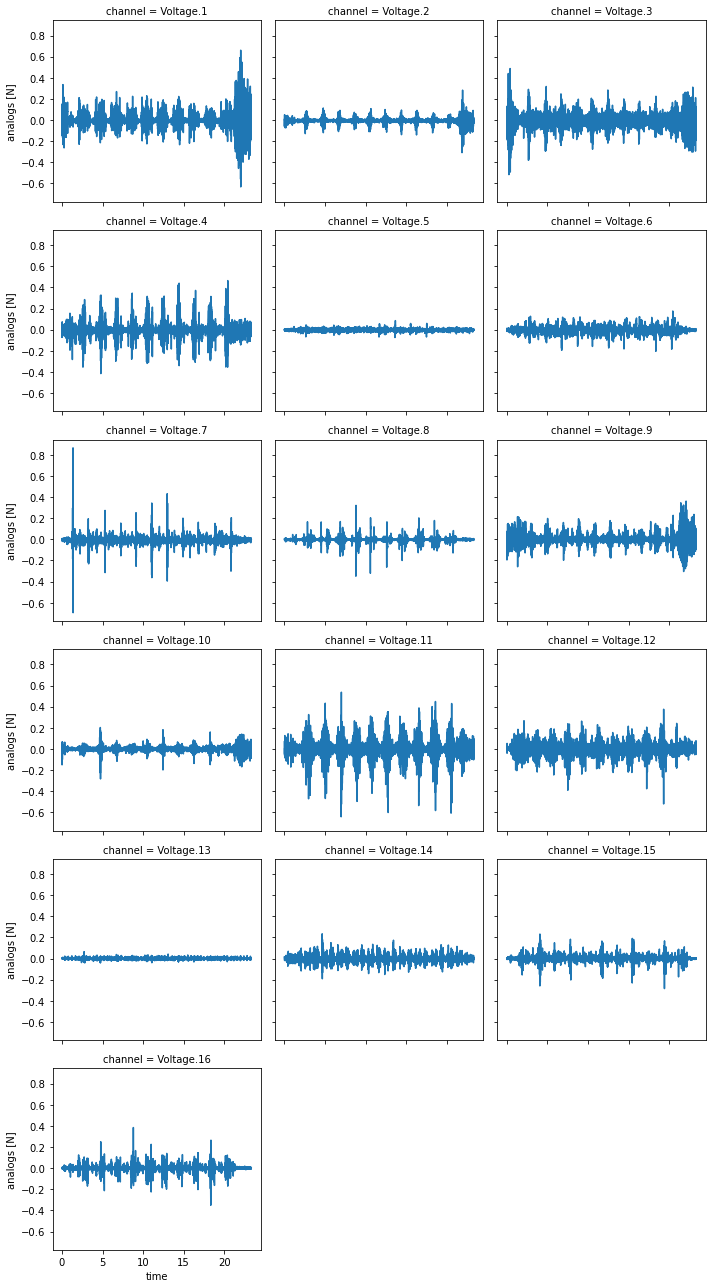

In [2]:
from pyomeca import Analogs

data_path = r"C:\Users\gmultimedia.PJATK17\Desktop\PjatkM\2020-08-07-B0448-S01-E02-T01.c3d"
muscles = ["Voltage.1","Voltage.2","Voltage.3","Voltage.4","Voltage.5","Voltage.6","Voltage.7","Voltage.8","Voltage.9","Voltage.10","Voltage.11","Voltage.12","Voltage.13","Voltage.14","Voltage.15","Voltage.16"]
muscles_names = ["Czworoboczny grzbietu L","Trójgłowy ramienia L", "Dwugłowy ramienia L", "Prostownik nadgarstka L","Skośny brzucha L", "Pośladkowy średni L","Czworogłowy uda L", "Brzuchaty łydki L","Czworoboczny grzbietu P","Trójgłowy ramienia P", "Dwugłowy ramienia P", "Prostownik nadgarstka P","Skośny brzucha P", "Pośladkowy średni P","Czworogłowy uda P", "Brzuchaty łydki P"]


emg = Analogs.from_c3d(data_path, usecols=muscles)
emg.plot(x="time", col="channel", col_wrap=3)

# Obróbka danych EMG

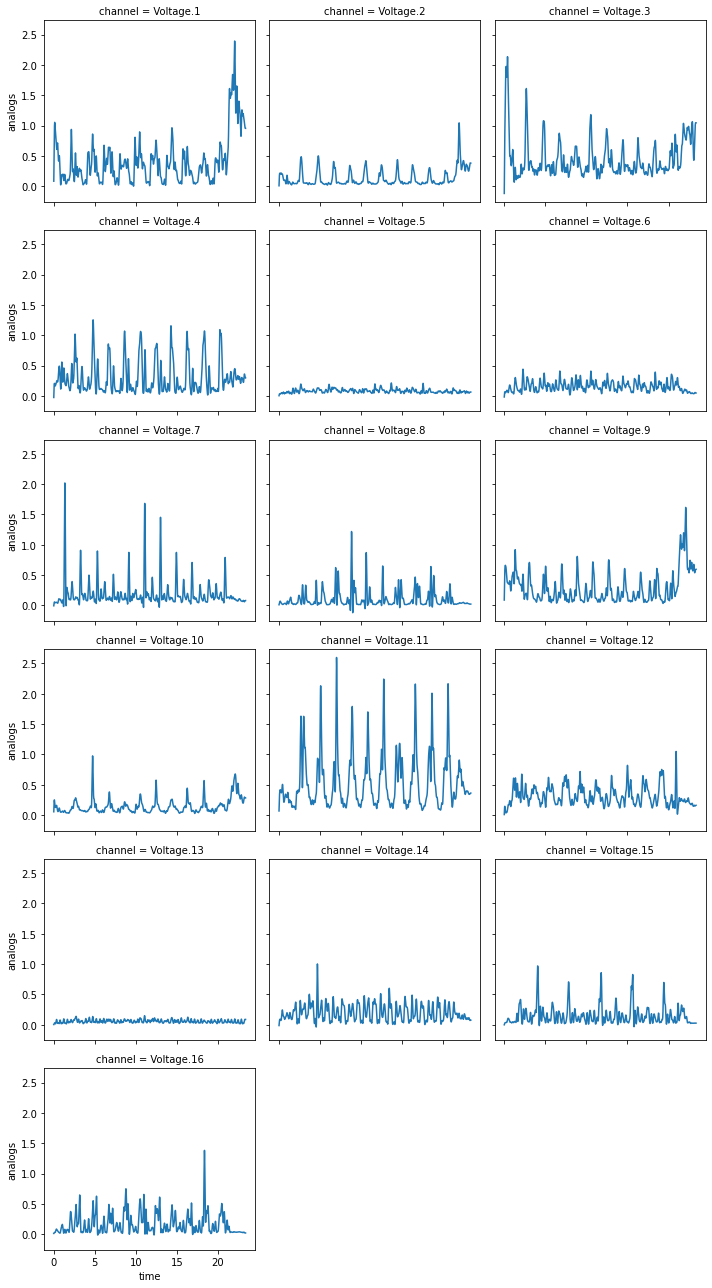

In [3]:
emg_processed = (
    emg.meca.band_pass(order=2, cutoff=[10, 425])
    .meca.center()
    .meca.abs()
    .meca.low_pass(order=4, cutoff=5, freq=emg.rate)
    .meca.normalize(8)
)

emg_processed.plot(x="time", col="channel", col_wrap=3)

# Wyświetlenie danych z nazwami mięśni

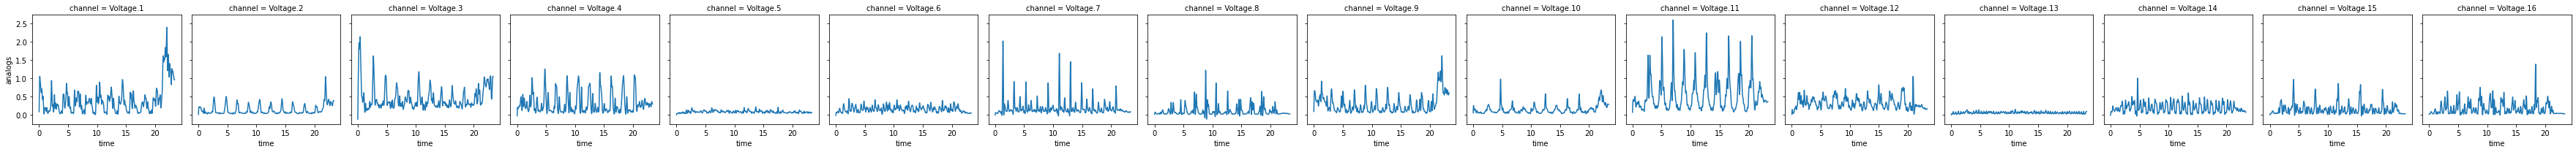

In [4]:
emg_processed.plot(col="channel")

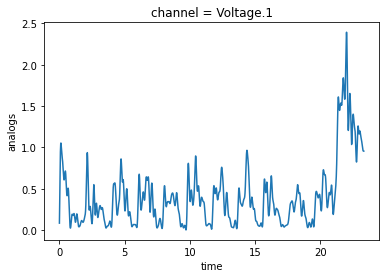

In [5]:
emg_processed[0].plot()

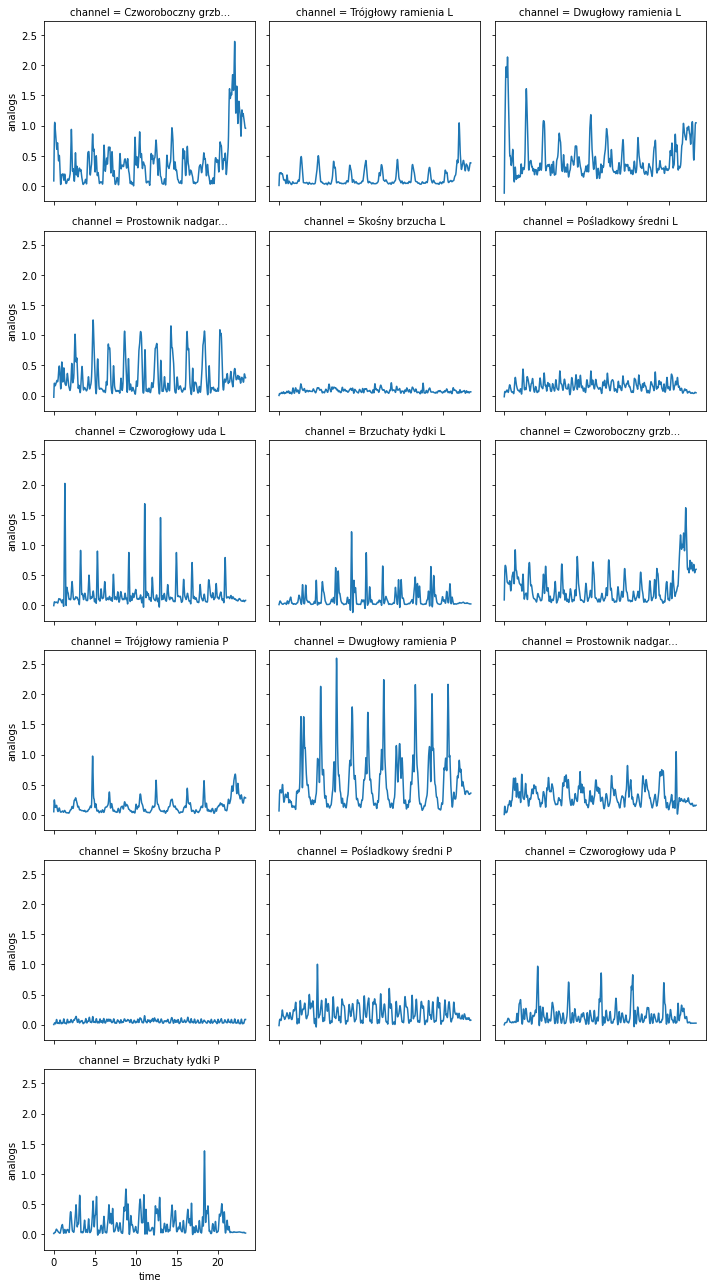

In [6]:
emg_processed.indexes
emg_processed['channel'] = muscles_names
emg_processed.plot(x="time", col="channel", col_wrap=3)

In [7]:
from scipy import stats

In [8]:
emg_2 = stats.zscore(emg_processed[0])

# Wykresy wczytywane pojedyńczo

(1, 23345)


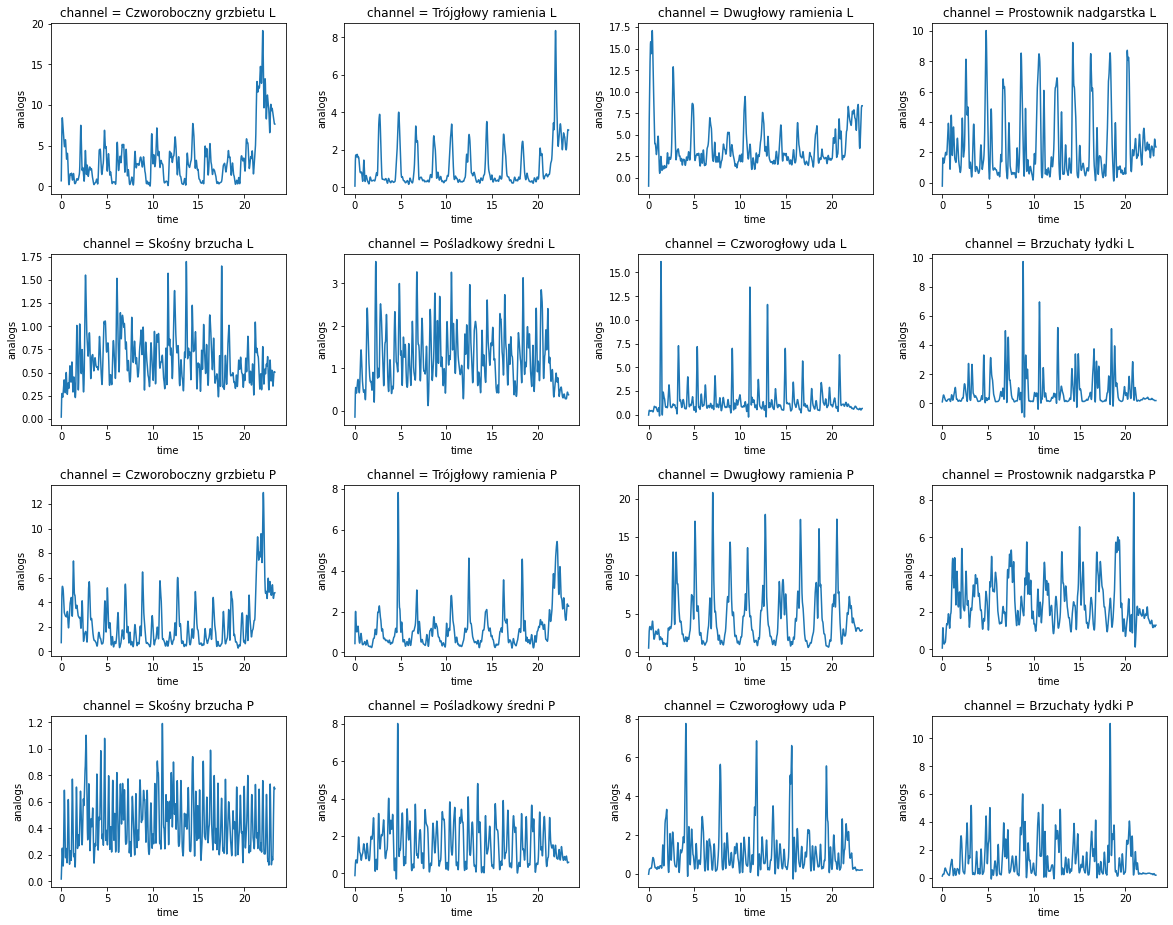

In [9]:
from matplotlib.pyplot import subplot
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

from sklearn import preprocessing
import numpy as np

from matplotlib import scale as mscale



muscles = [["Voltage.1"],["Voltage.2"],["Voltage.3"],["Voltage.4"],["Voltage.5"],["Voltage.6"],["Voltage.7"],["Voltage.8"],["Voltage.9"],["Voltage.10"],["Voltage.11"],["Voltage.12"],["Voltage.13"],["Voltage.14"],["Voltage.15"],["Voltage.16"]]
muscles_names = [["Czworoboczny grzbietu L"],["Trójgłowy ramienia L"], ["Dwugłowy ramienia L"], ["Prostownik nadgarstka L"],["Skośny brzucha L"], ["Pośladkowy średni L"],["Czworogłowy uda L"], ["Brzuchaty łydki L"],["Czworoboczny grzbietu P"],["Trójgłowy ramienia P"], ["Dwugłowy ramienia P"], ["Prostownik nadgarstka P"],["Skośny brzucha P"], ["Pośladkowy średni P"],["Czworogłowy uda P"], ["Brzuchaty łydki P"]]



#print(muscles[0])
emg_list=[]

plt.figure(figsize=(20,15))

for i in range(0,16): 
    emg_list.append(Analogs.from_c3d(data_path, usecols=muscles[i]))
    
    emg_p = (
    emg_list[i].meca.band_pass(order=2, cutoff=[10, 425])
    .meca.center()
    .meca.abs()
    .meca.low_pass(order=4, cutoff=5, freq=emg.rate)
    .meca.normalize(1)
    )
    
    #print(emg_p.indexes)
    emg_p['channel'] = muscles_names[i]
    subplot(4, 4, i+1)
    emg_p.plot(x="time")

    
    #plt.show()
    
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.35)

print(emg_p.shape)
#print(emg_p[1])
#normalized = preprocessing.normalize(a)

In [10]:
import sys

print(emg_p)
print(emg_p[0][0])
print(emg_p.shape[1])

maxi=0
for i in range(emg_p.shape[1]):
    if emg_p[0][i]>maxi:
        maxi=emg_p[0][i]
        
print(maxi)





<xarray.DataArray 'analogs' (channel: 1, time: 23345)>
array([[0.11355068, 0.11570677, 0.11787526, ..., 0.17585332, 0.17585416,
        0.17585483]])
Coordinates:
  * channel  (channel) <U17 'Brzuchaty łydki P'
  * time     (time) float64 0.0 0.001 0.002 0.003 ... 23.34 23.34 23.34 23.34
<xarray.DataArray 'analogs' ()>
array(0.11355068)
Coordinates:
    channel  <U17 'Brzuchaty łydki P'
    time     float64 0.0
23345
<xarray.DataArray 'analogs' ()>
array(11.06817823)
Coordinates:
    channel  <U17 'Brzuchaty łydki P'
    time     float64 18.34


In [11]:
max(emg_p)

<xarray.DataArray 'analogs' (time: 23345)>
array([0.11355068, 0.11570677, 0.11787526, ..., 0.17585332, 0.17585416,
       0.17585483])
Coordinates:
    channel  <U17 'Brzuchaty łydki P'
  * time     (time) float64 0.0 0.001 0.002 0.003 ... 23.34 23.34 23.34 23.34

# Normalizacja wyników

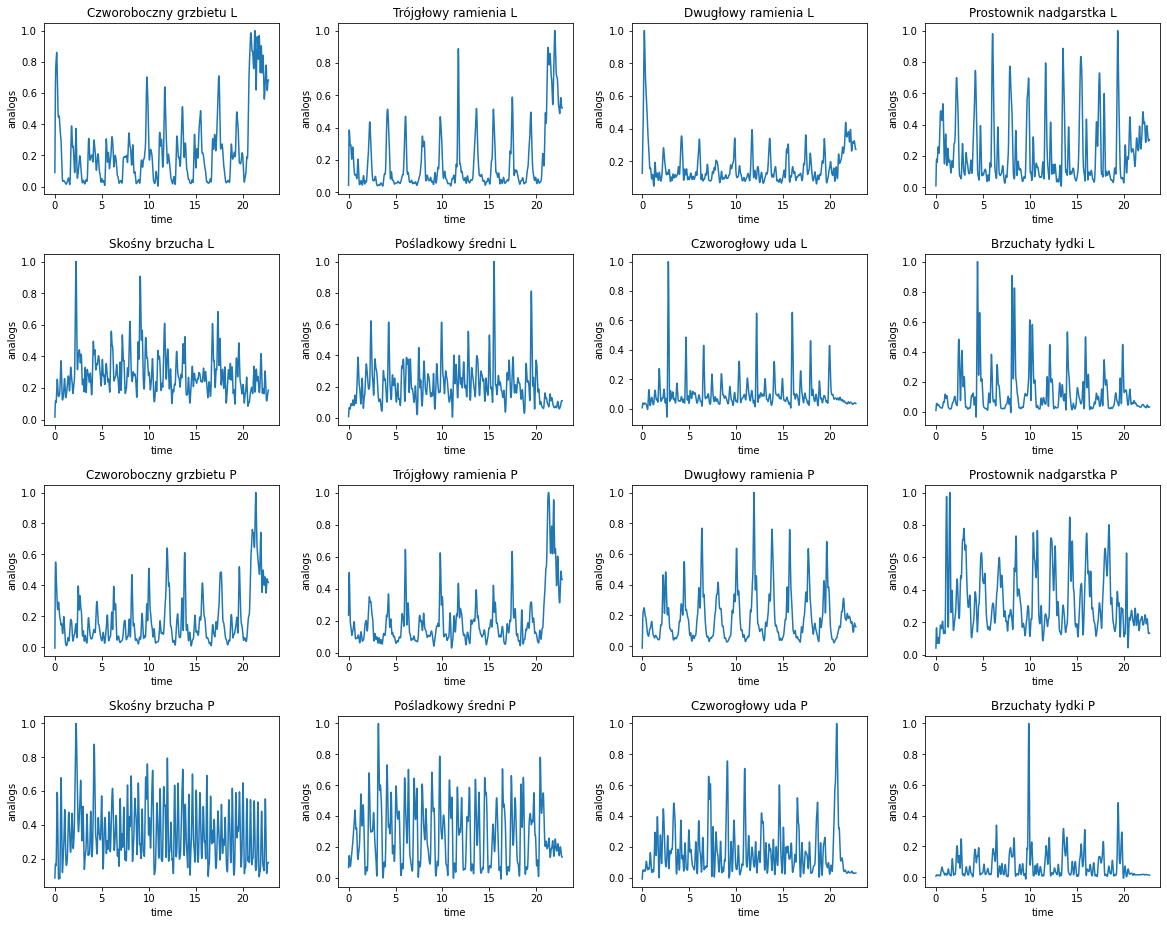

In [50]:
import sys
from matplotlib.pyplot import subplot
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
from matplotlib import scale as mscale



muscles = [["Voltage.1"],["Voltage.2"],["Voltage.3"],["Voltage.4"],["Voltage.5"],["Voltage.6"],["Voltage.7"],["Voltage.8"],["Voltage.9"],["Voltage.10"],["Voltage.11"],["Voltage.12"],["Voltage.13"],["Voltage.14"],["Voltage.15"],["Voltage.16"]]
muscles_names = [["Czworoboczny grzbietu L"],["Trójgłowy ramienia L"], ["Dwugłowy ramienia L"], ["Prostownik nadgarstka L"],["Skośny brzucha L"], ["Pośladkowy średni L"],["Czworogłowy uda L"], ["Brzuchaty łydki L"],["Czworoboczny grzbietu P"],["Trójgłowy ramienia P"], ["Dwugłowy ramienia P"], ["Prostownik nadgarstka P"],["Skośny brzucha P"], ["Pośladkowy średni P"],["Czworogłowy uda P"], ["Brzuchaty łydki P"]]
muscles_names2 = ["Czworoboczny grzbietu L","Trójgłowy ramienia L", "Dwugłowy ramienia L", "Prostownik nadgarstka L","Skośny brzucha L", "Pośladkowy średni L","Czworogłowy uda L", "Brzuchaty łydki L","Czworoboczny grzbietu P","Trójgłowy ramienia P", "Dwugłowy ramienia P", "Prostownik nadgarstka P","Skośny brzucha P", "Pośladkowy średni P","Czworogłowy uda P", "Brzuchaty łydki P"]

max_val=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

emg_list=[]

emg_processed=[[]]

plt.figure(figsize=(20,15))


for i in range(0,16): 
    #emg_processed.append(muscles_names2[i])
    emg_processed.append([])
    
    emg_norm_value=[]
    emg_list.append(Analogs.from_c3d(data_path, usecols=muscles[i]))
    
    emg_p = (
    emg_list[i].meca.band_pass(order=2, cutoff=[10, 425])
    .meca.center()
    .meca.abs()
    .meca.low_pass(order=4, cutoff=5, freq=emg.rate)
    #.meca.normalize(1)
    )
    emg_p['channel'] = muscles_names[i]
    subplot(4, 4, i+1)
    for j in range(emg_p.shape[1]):
        if emg_p[0][j].values>max_val[i]:
            max_val[i]=emg_p[0][j].values
    for k in range(emg_p.shape[1]):
        emg_norm_value.append(emg_p[0][k].values/max_val[i])
        #emg_processed.append([muscles_names2[i],emg_p.time.values[k],emg_norm_value[k]])
    #emg_norm=[emg_p.time.values,emg_norm_value]
    
    
    emg_processed[i].append(emg_p.time.values)
    emg_processed[i].append(emg_norm_value)
    
    
    plt.plot(emg_p.time.values,emg_norm_value)
    plt.xlabel("time")
    plt.ylabel("analogs");
    plt.title(muscles_names2[i])
    
    #plt.show()
    
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.35)








In [15]:
print(emg_p)
print(emg_p.time.values)



<xarray.DataArray 'analogs' (channel: 1, time: 23345)>
array([[0.00113551, 0.00115707, 0.00117875, ..., 0.00175853, 0.00175854,
        0.00175855]])
Coordinates:
  * channel  (channel) <U17 'Brzuchaty łydki P'
  * time     (time) float64 0.0 0.001 0.002 0.003 ... 23.34 23.34 23.34 23.34
[0.0000e+00 1.0000e-03 2.0000e-03 ... 2.3342e+01 2.3343e+01 2.3344e+01]


Text(0.5, 1.0, "['Brzuchaty łydki P']")

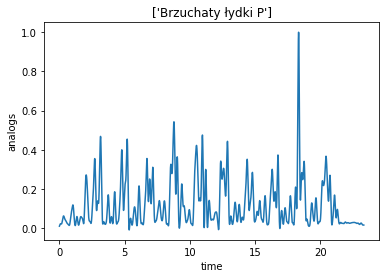

In [16]:
plt.plot(emg_p.time.values,emg_norm_value)
plt.xlabel("time")
plt.ylabel("analogs");
plt.title(muscles_names[i])


In [17]:
#print(emg_processed)

# Funkcja odczytująca eventy

In [18]:
from ezc3d import c3d
import numpy as np

def read_labels(data_path):
    c3d_to_compare= c3d(data_path)
    event = c3d_to_compare['parameters']['EVENT']['LABELS']['value']
    time = np.around(c3d_to_compare['parameters']['EVENT']['TIMES']['value'][1]*1000)
    
    return [event, time]

In [19]:
read_labels(data_path)

[['Event',
  'Foot Strike',
  'Event',
  'Foot Strike',
  'Event',
  'Foot Strike',
  'Event',
  'Foot Strike',
  'Event',
  'Foot Strike',
  'Event',
  'Foot Strike',
  'Event',
  'Foot Strike',
  'Event',
  'Foot Strike',
  'Event',
  'Foot Strike',
  'Event',
  'Foot Strike'],
 array([ 1980.,  2870.,  4210.,  5120.,  6035.,  6995.,  8175.,  8865.,
         9870., 10805., 11745., 12770., 13840., 14710., 15575., 16645.,
        17650., 18540., 19700., 20660.])]

In [20]:
import data_procesing as dp
import numpy as np
import importlib



importlib.reload(dp)
data_path = r"C:\Users\gmultimedia.PJATK17\Desktop\PjatkM\2020-08-07-B0448-S01-E02-T01.c3d"
eventy = dp.read_labels(data_path)
print(eventy[1])

print(eventy[0][15])
print(eventy[0][:])
eventy[0].index('Foot Strike')


indxE = [i for i, x in enumerate(eventy[0]) if x == "Event"]
print(indxE)
indxFS = [i for i, x in enumerate(eventy[0]) if x == "Foot Strike"]
print(indxFS)

CzasFS = np.zeros(len(indxFS))
for i in range(len(indxFS)):
    print(indxFS[i])
    CzasFS[i] = eventy[1][indxFS[i]]
print('Czasy Foot Strikeów',CzasFS)

CzasE = np.zeros(len(indxE))
for i in range(len(indxE)):
    print(indxE[i])
    CzasE[i] = eventy[1][indxE[i]]
print('Czasy Eventów:',CzasE)
print(eventy[1])
eventy[1].sort()
print(eventy[1])

[ 1755.  3515.  5360.  7250.  9095. 10985. 12895. 14805. 16655. 18740.
 20280.  2450.  4360.  6230.  7965.  9855. 11830. 13810. 15675. 17610.
 19630.]
Foot Strike
['Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Foot Strike', 'Foot Strike', 'Foot Strike', 'Foot Strike', 'Foot Strike', 'Foot Strike', 'Foot Strike', 'Foot Strike', 'Foot Strike', 'Foot Strike']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
11
12
13
14
15
16
17
18
19
20
Czasy Foot Strikeów [ 2450.  4360.  6230.  7965.  9855. 11830. 13810. 15675. 17610. 19630.]
0
1
2
3
4
5
6
7
8
9
10
Czasy Eventów: [ 1755.  3515.  5360.  7250.  9095. 10985. 12895. 14805. 16655. 18740.
 20280.]
[ 1755.  3515.  5360.  7250.  9095. 10985. 12895. 14805. 16655. 18740.
 20280.  2450.  4360.  6230.  7965.  9855. 11830. 13810. 15675. 17610.
 19630.]
[ 1755.  2450.  3515.  4360.  5360.  6230.  7250.  7965.  9095.  9855.
 10985. 11830. 12895. 13810. 14805. 15675. 16655.

In [62]:
p=np.zeros(10)
d=np.zeros(10)
j=0
for i in range(len(eventy[1])):
    if not i >= len(eventy[1])-2:
        pierwszy = eventy[1][i]
        drugi = eventy[1][i+1]
        trzeci = eventy[1][i+2]
        if pierwszy in CzasE:
            if drugi in CzasFS:
                if trzeci in CzasE:
                    p[j]=pierwszy
                    d[j]=trzeci
                    j+=1
p=p.astype(int)
d=d.astype(int)

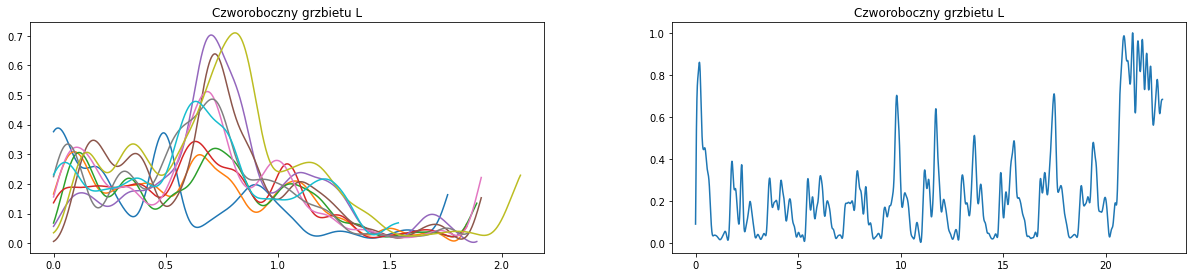

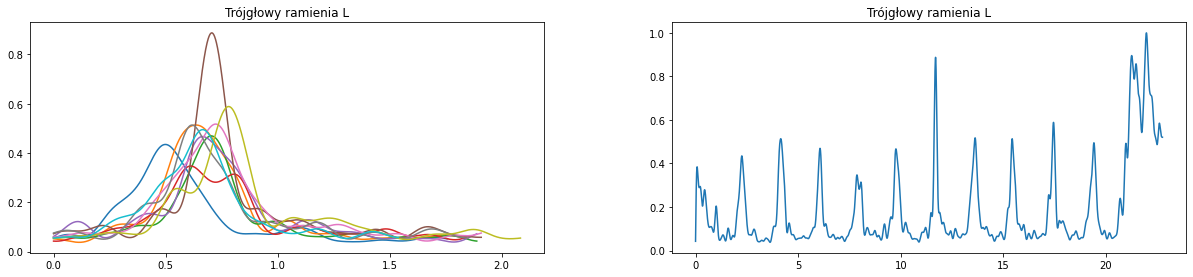

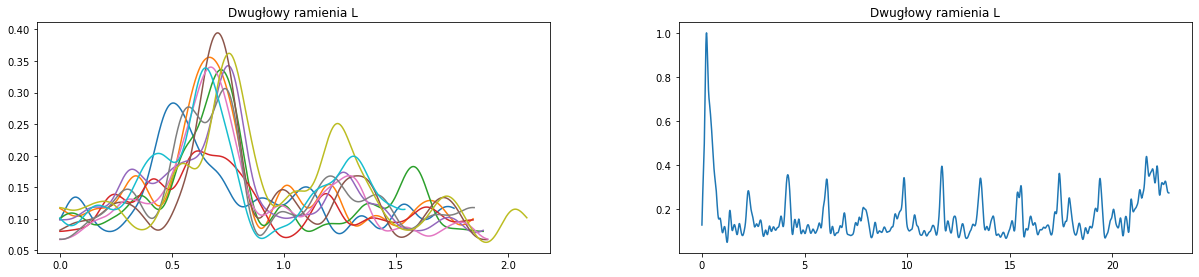

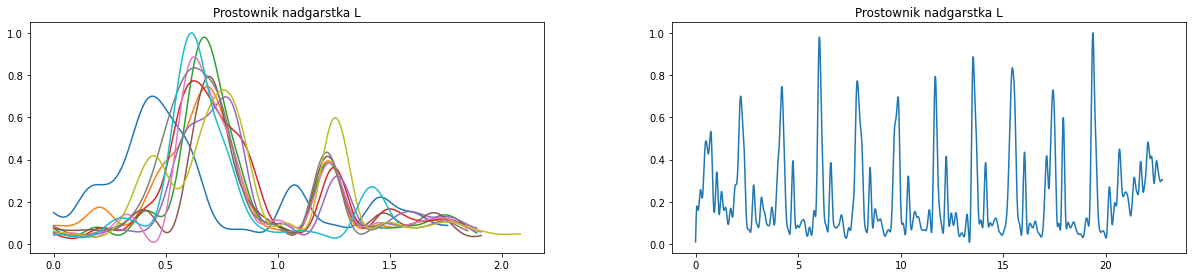

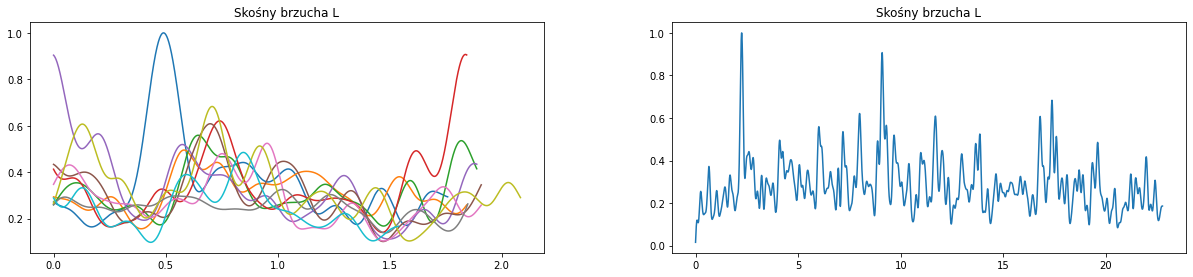

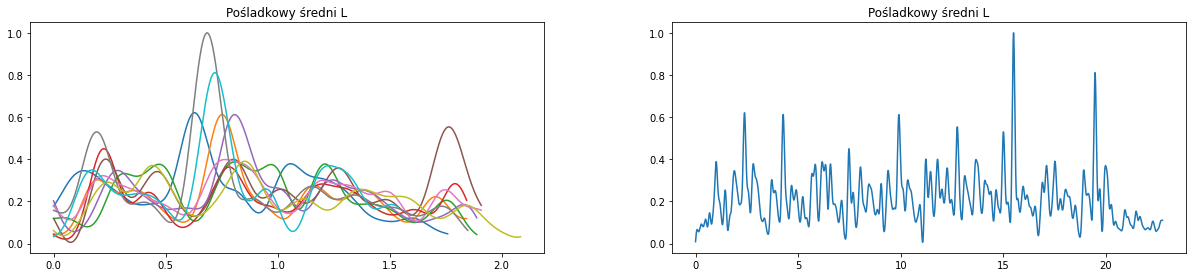

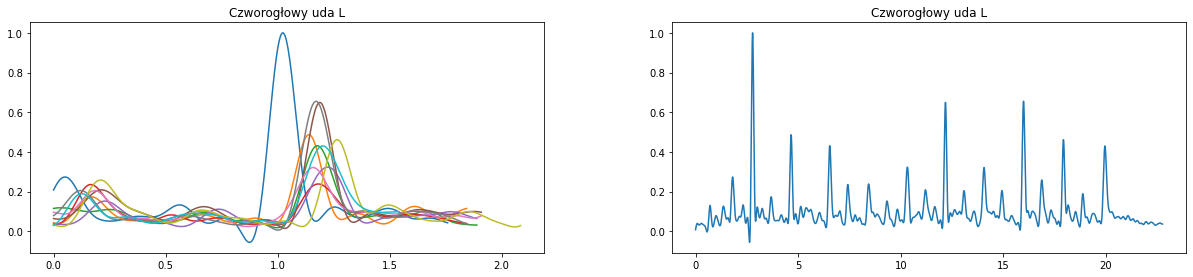

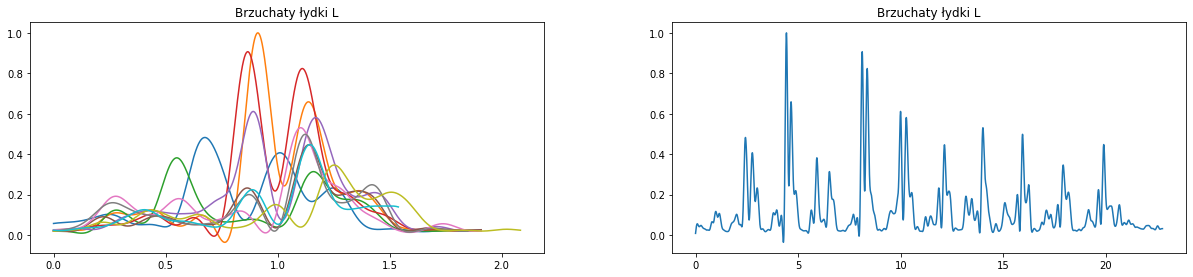

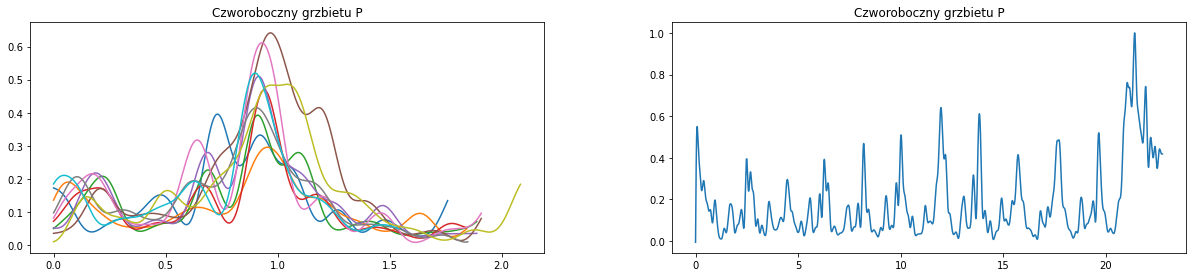

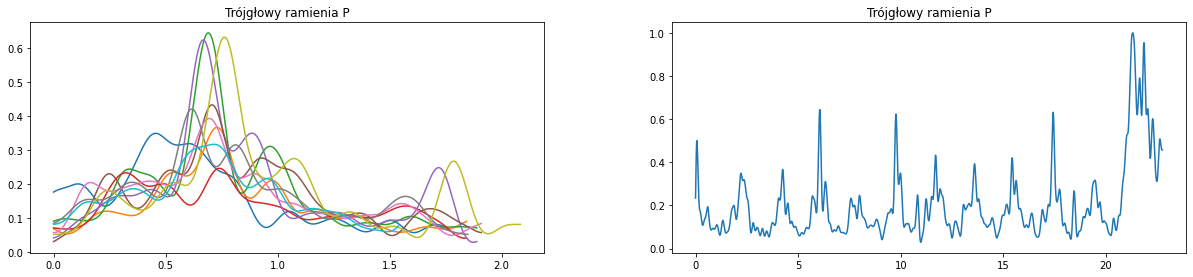

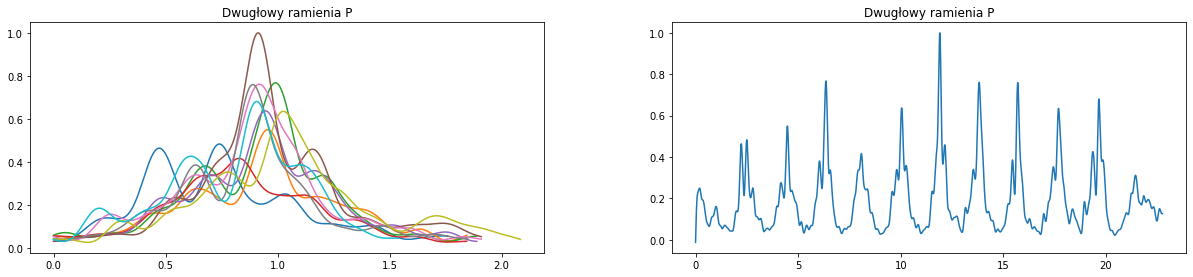

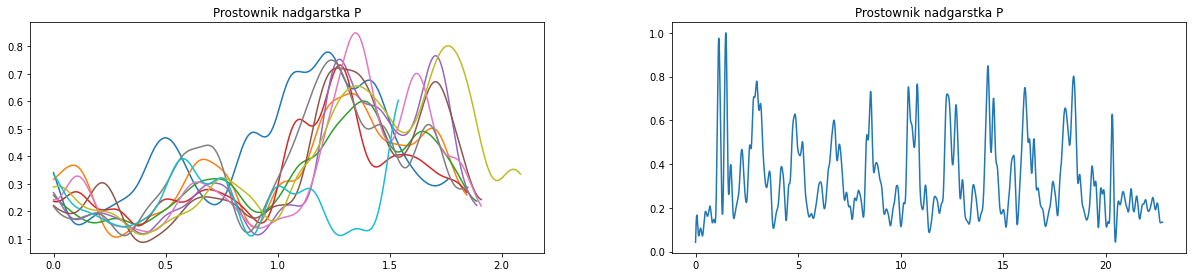

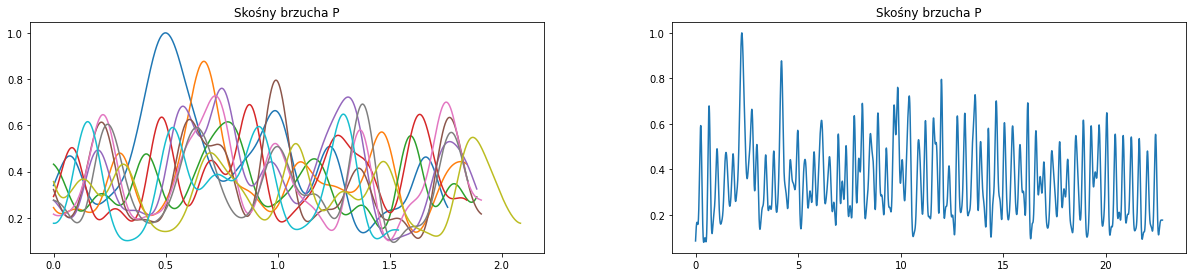

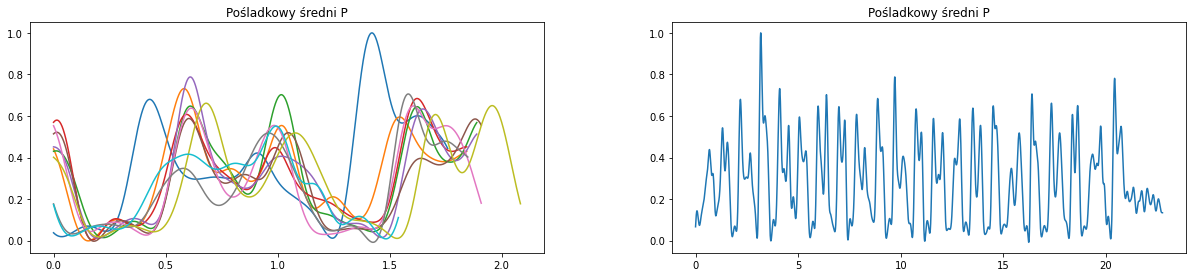

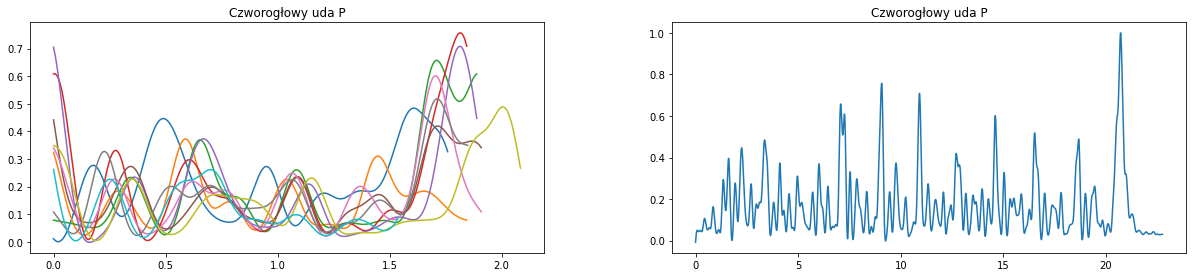

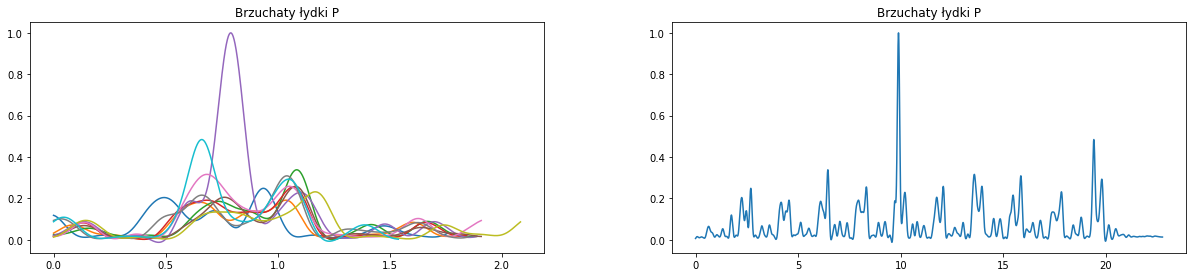

In [162]:
num=0
#print(p)


for num in range(16):
    subplot(1, 2, 1)
    plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=2.8, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.35)
    for i in range(10):
    
        #if i==1:
        #    plt.plot(emg_processed[1][0][p[i]:d[i]],emg_processed[1][1][p[i]:d[i]])
        #else:
        plt.plot(emg_processed[num][0][p[i]:d[i]]-emg_processed[num][0][p[i]],emg_processed[num][1][p[i]:d[i]])
        plt.title(muscles_names2[num])
    #plt.show()


    subplot(1, 2, 2)
    plt.plot(emg_processed[num][0],emg_processed[num][1])
    plt.title(muscles_names2[num])
    plt.show()
    

    

    


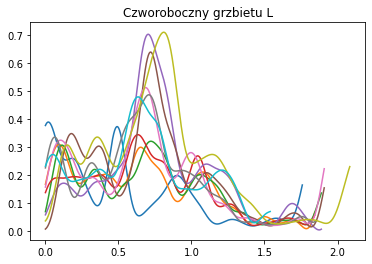

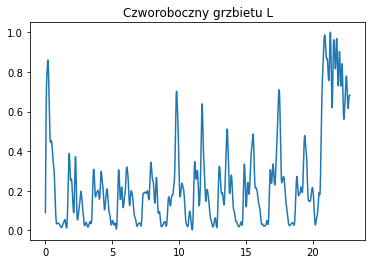

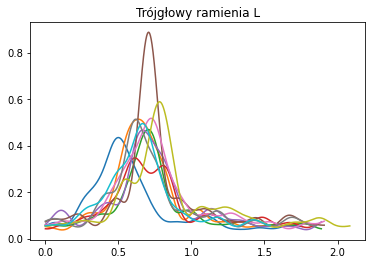

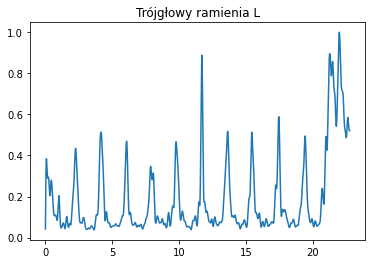

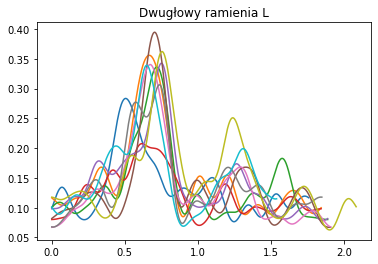

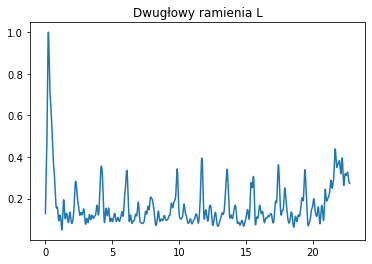

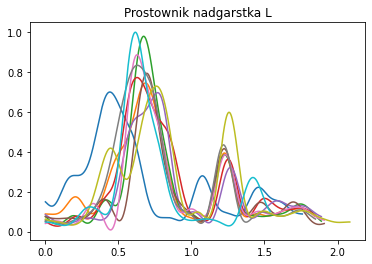

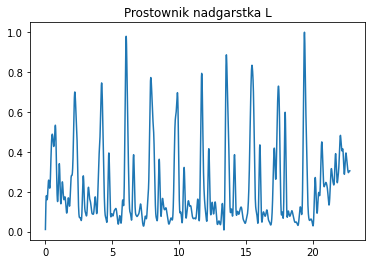

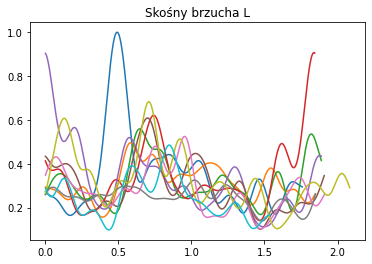

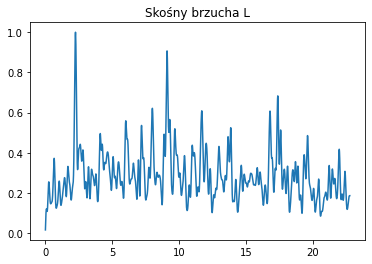

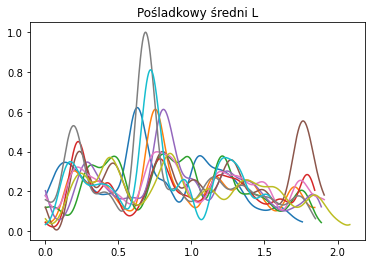

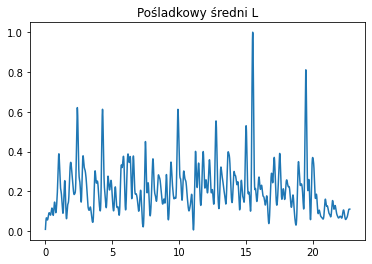

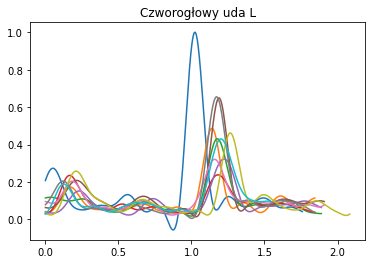

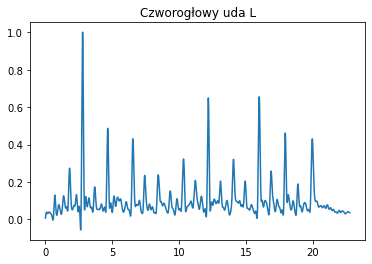

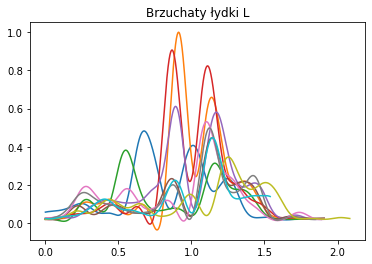

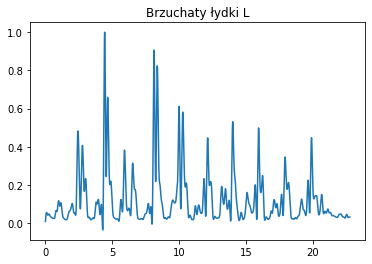

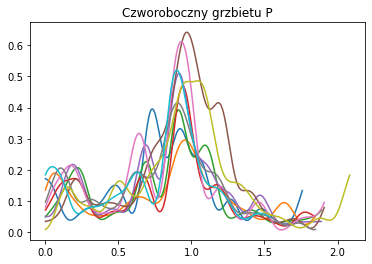

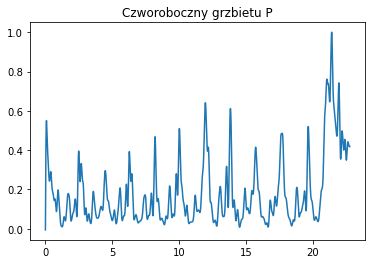

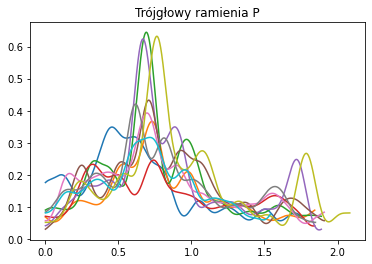

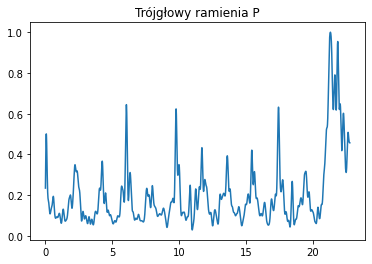

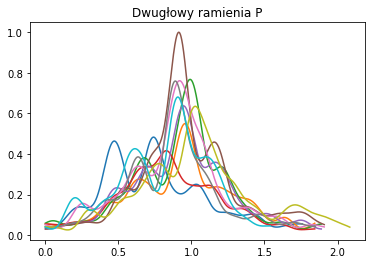

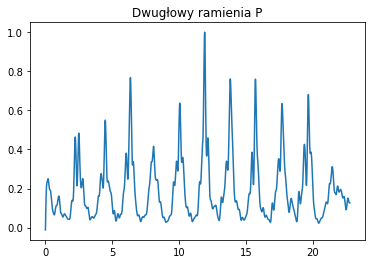

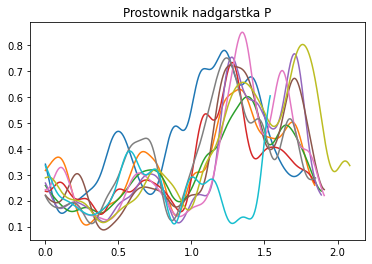

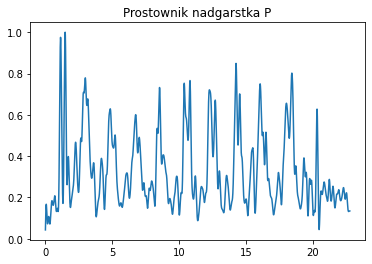

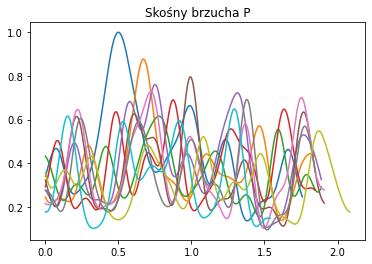

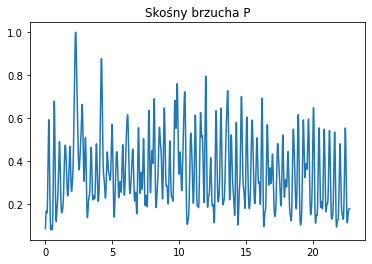

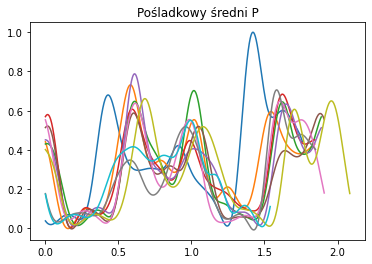

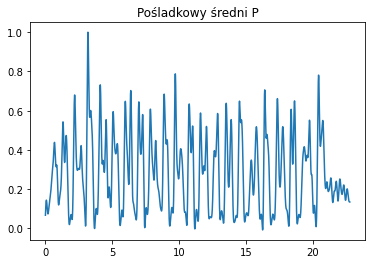

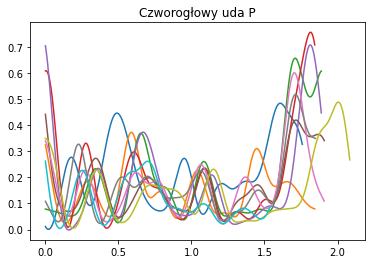

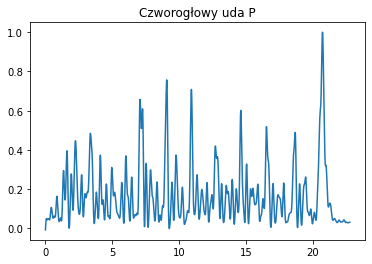

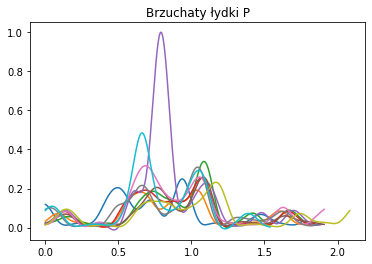

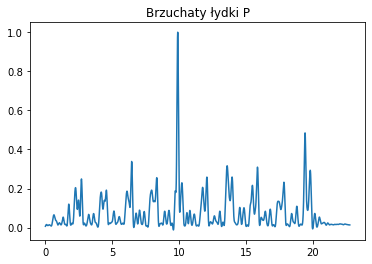

In [35]:
emg_processed[0][1000][0]


1.0

In [ ]:
emg_processed[0][1000][0]

In [53]:
for i in range(10):
    for j in range(p[i],d[i]):
        plt.plot(emg_processed[0][j][0],emg_processed[0][j][1])
plt.show()

IndexError: list index out of range

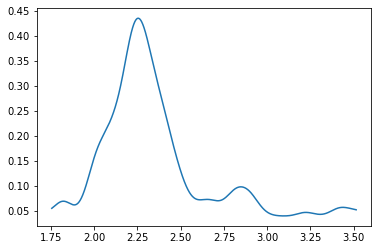

In [57]:
plt.plot(emg_processed[1][0][p[i]:d[i]],emg_processed[1][1][p[i]:d[i]])




# Porownanie pracy miesni

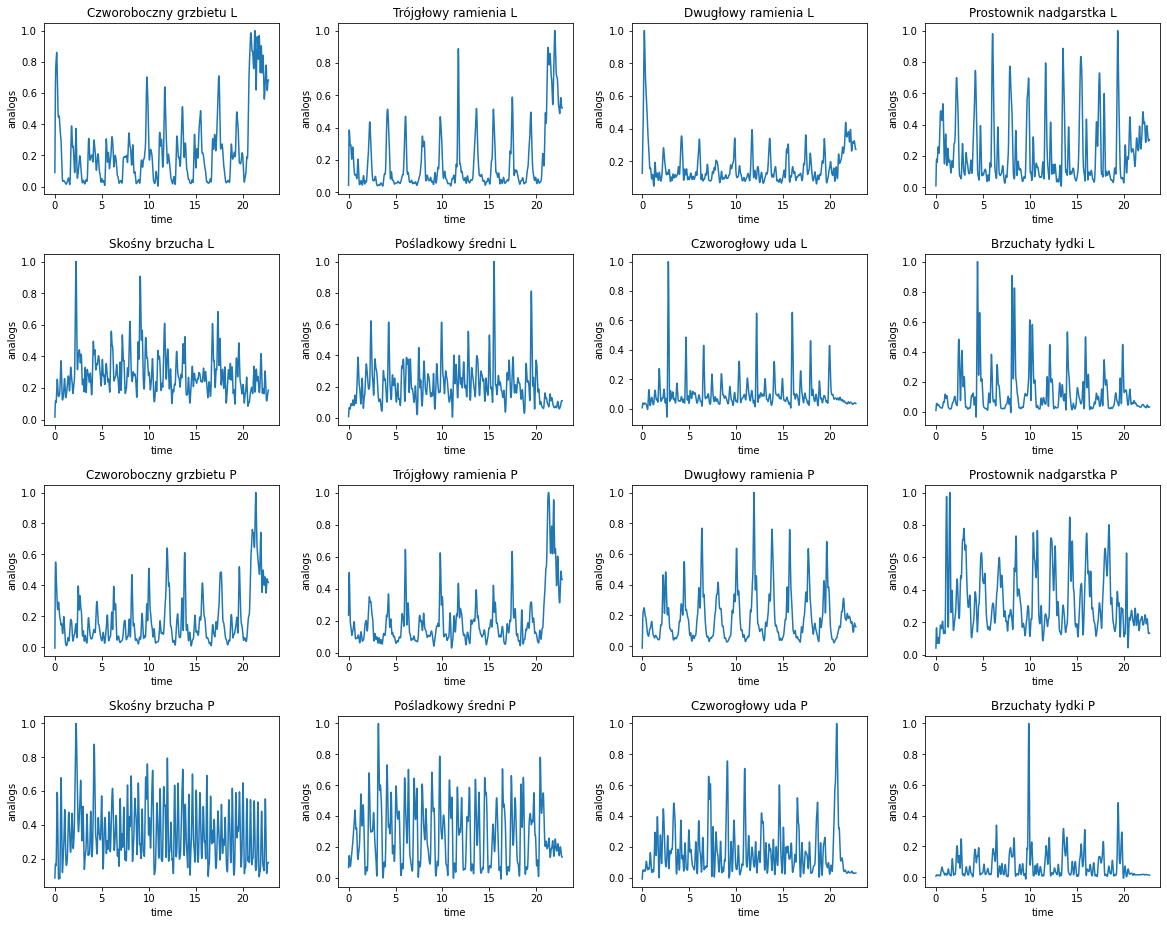

In [172]:
import glob
#muscles = [["Voltage.1"],["Voltage.2"],["Voltage.3"],["Voltage.4"],["Voltage.5"],["Voltage.6"],["Voltage.7"],["Voltage.8"],["Voltage.9"],["Voltage.10"],["Voltage.11"],["Voltage.12"],["Voltage.13"],["Voltage.14"],["Voltage.15"],["Voltage.16"]]
muscles1 = ["Voltage.1","Voltage.2","Voltage.3","Voltage.4","Voltage.5","Voltage.6","Voltage.7","Voltage.8","Voltage.9","Voltage.10","Voltage.11","Voltage.12","Voltage.13","Voltage.14","Voltage.15","Voltage.16"]

path2=r"C:\Users\gmultimedia.PJATK17\Desktop\PjatkM\2020-08-07-B0448-S01-E02-T02.c3d"
emg_2 = Analogs.from_c3d(path2, usecols=muscles1)


max_val_2=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

emg_list_2=[]

emg_processed_2=[[]]

plt.figure(figsize=(20,15))


for i in range(0,16): 
    #emg_processed.append(muscles_names2[i])
    emg_processed_2.append([])
    
    emg_norm_value_2=[]
    emg_list_2.append(Analogs.from_c3d(path2, usecols=muscles[i]))
    
    emg_p_2 = (
    emg_list_2[i].meca.band_pass(order=2, cutoff=[10, 425])
    .meca.center()
    .meca.abs()
    .meca.low_pass(order=4, cutoff=5, freq=emg.rate)
    #.meca.normalize(1)
    )
    emg_p_2['channel'] = muscles_names[i]
    subplot(4, 4, i+1)
    for j in range(emg_p_2.shape[1]):
        if emg_p_2[0][j].values>max_val_2[i]:
            max_val_2[i]=emg_p_2[0][j].values
    for k in range(emg_p_2.shape[1]):
        emg_norm_value_2.append(emg_p_2[0][k].values/max_val_2[i])
        #emg_processed.append([muscles_names2[i],emg_p.time.values[k],emg_norm_value[k]])
    #emg_norm=[emg_p.time.values,emg_norm_value]
    
    
    emg_processed_2[i].append(emg_p_2.time.values)
    emg_processed_2[i].append(emg_norm_value_2)
    
    
    plt.plot(emg_p_2.time.values,emg_norm_value_2)
    plt.xlabel("time")
    plt.ylabel("analogs");
    plt.title(muscles_names2[i])
    
    #plt.show()
    
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.35)



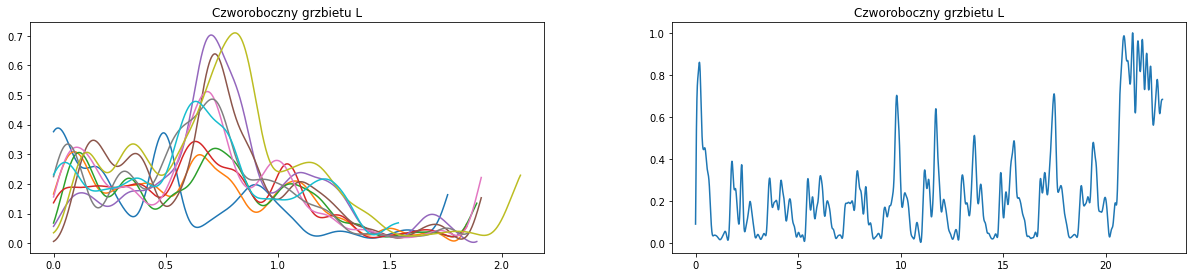

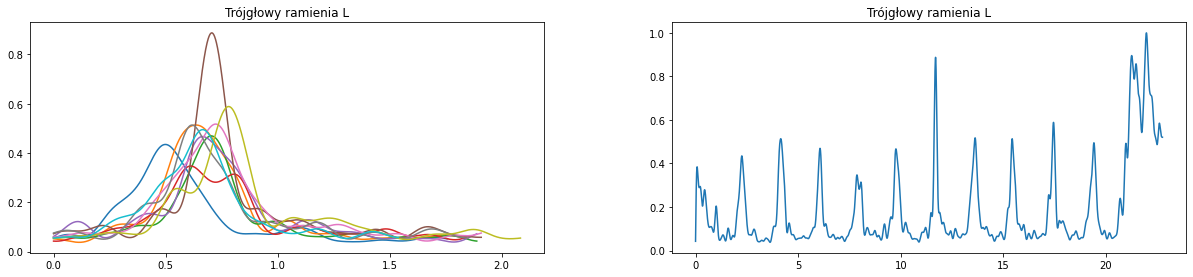

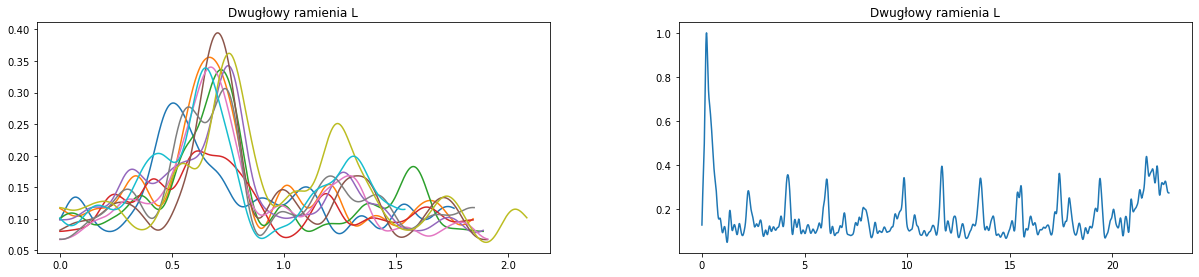

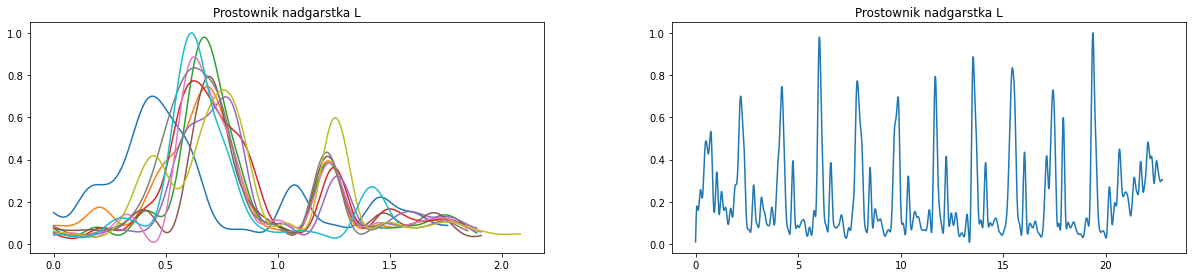

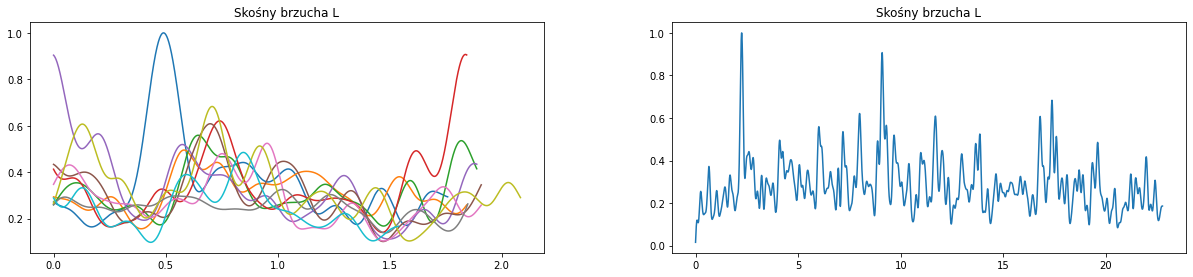

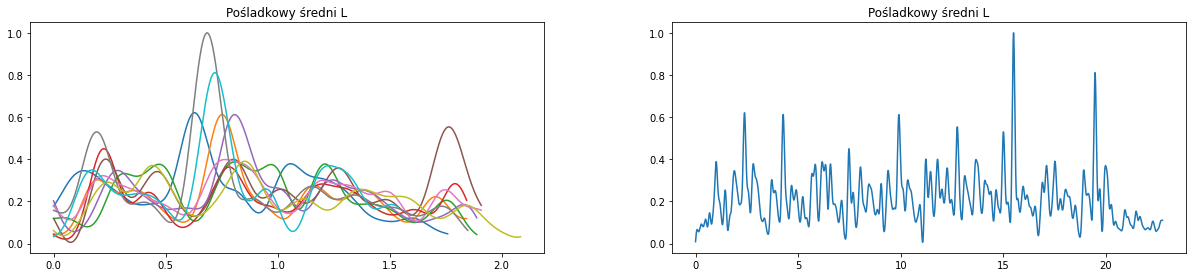

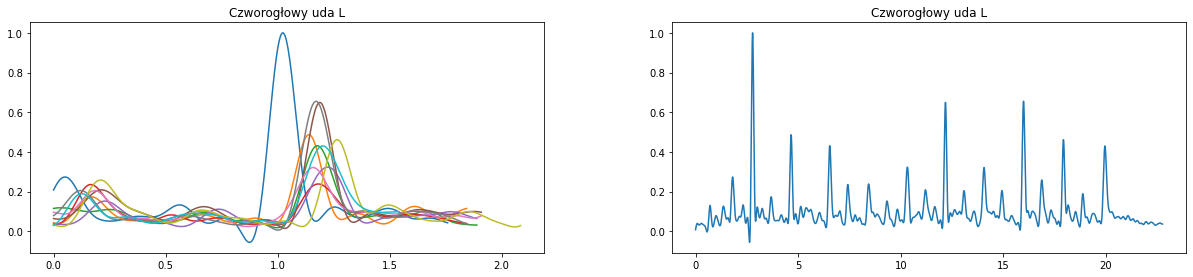

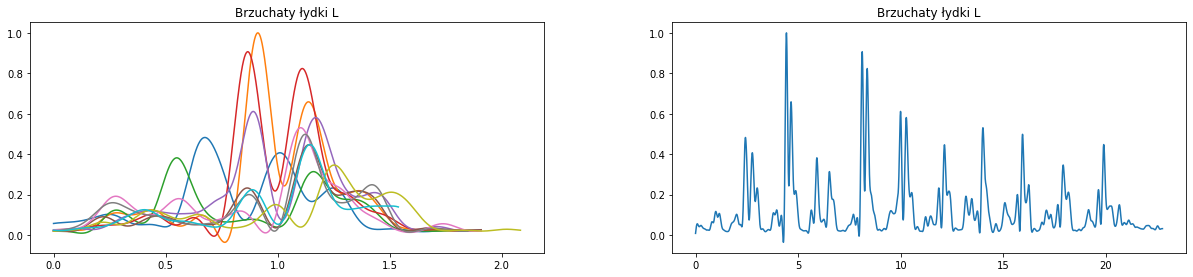

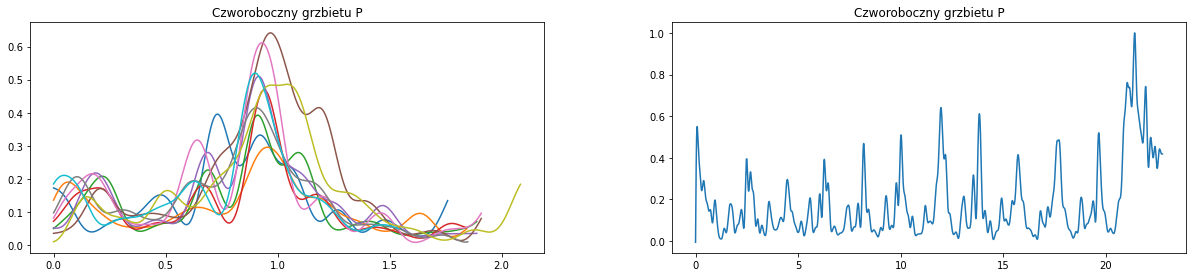

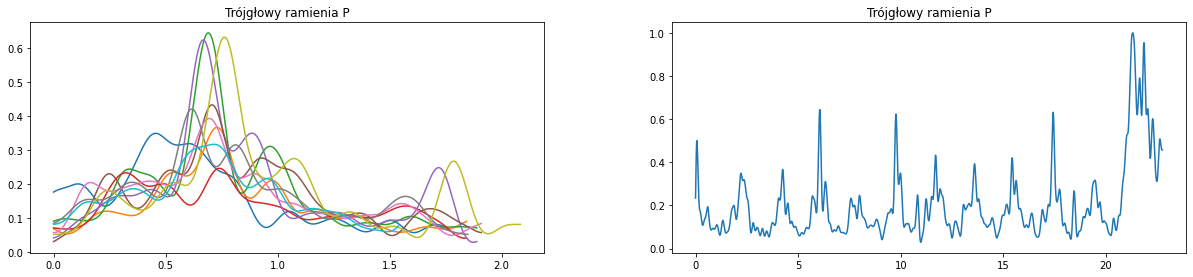

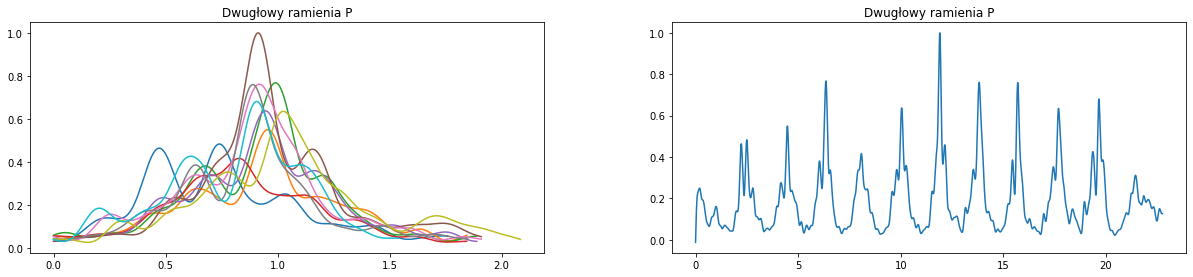

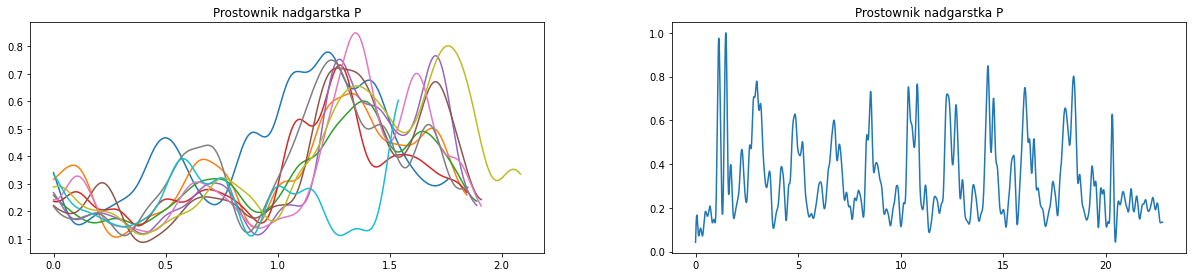

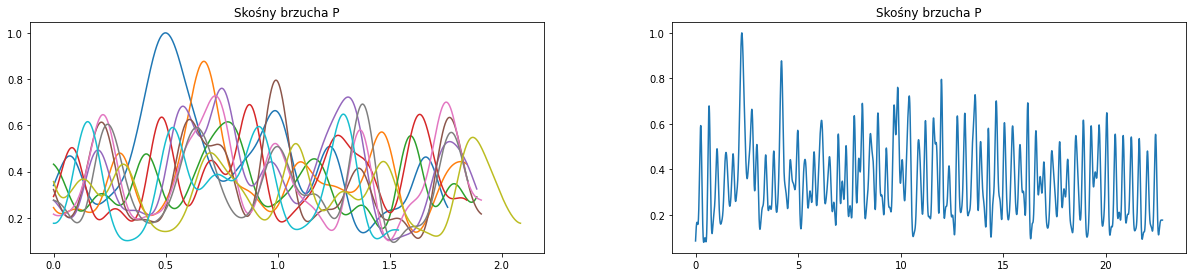

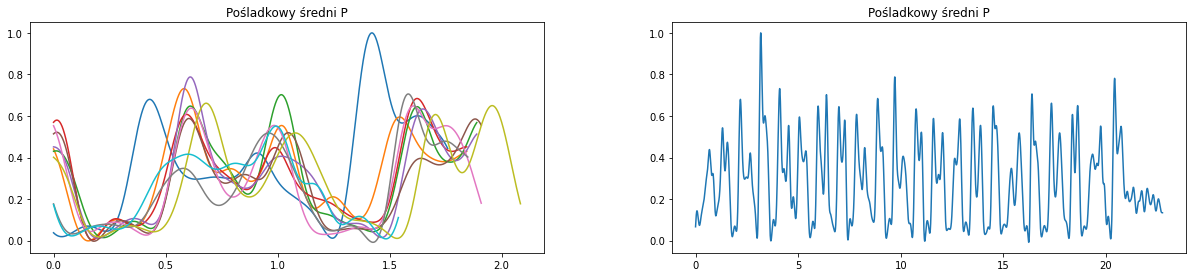

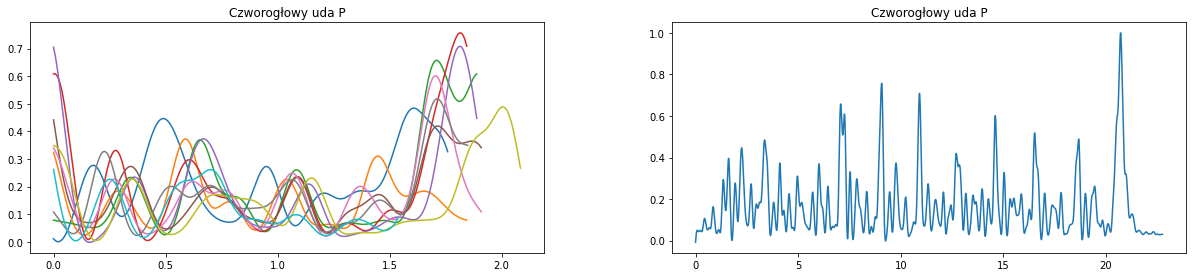

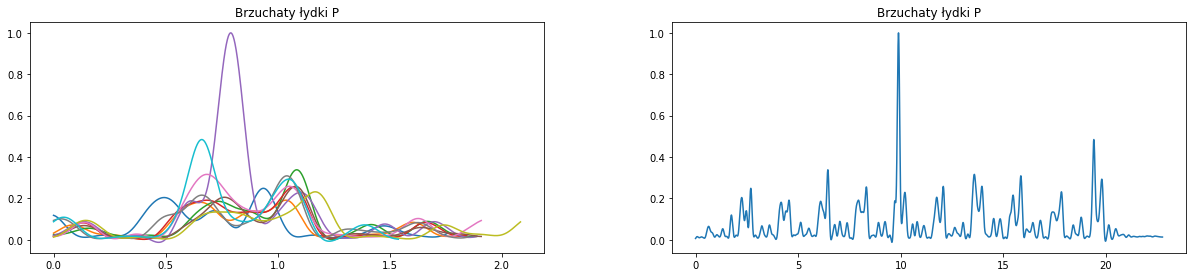

In [179]:
for num in range(16):
    subplot(1, 2, 1)
    plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=2.8, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.35)
    for i in range(10):
    
        #if i==1:
        #    plt.plot(emg_processed[1][0][p[i]:d[i]],emg_processed[1][1][p[i]:d[i]])
        #else:
        plt.plot(emg_processed[num][0][p[i]:d[i]]-emg_processed[num][0][p[i]],emg_processed[num][1][p[i]:d[i]])
        plt.title(muscles_names2[num])
    #plt.show()


    subplot(1, 2, 2)
    plt.plot(emg_processed[num][0],emg_processed[num][1])
    plt.title(muscles_names2[num])
    plt.show()
    

In [180]:
def read_events(data_path):
    importlib.reload(dp)
    eventy = dp.read_labels(data_path)

    eventy[0].index('Foot Strike')


    indxE = [i for i, x in enumerate(eventy[0]) if x == "Event"]
    indxFS = [i for i, x in enumerate(eventy[0]) if x == "Foot Strike"]


    CzasFS = np.zeros(len(indxFS))
    for i in range(len(indxFS)):
        CzasFS[i] = eventy[1][indxFS[i]]

    CzasE = np.zeros(len(indxE))
    for i in range(len(indxE)):
        CzasE[i] = eventy[1][indxE[i]]
    eventy[1].sort()


    p=np.zeros(10)
    d=np.zeros(10)
    j=0
    for i in range(len(eventy[1])):
        if not i >= len(eventy[1])-2:
            pierwszy = eventy[1][i]
            drugi = eventy[1][i+1]
            trzeci = eventy[1][i+2]
            if pierwszy in CzasE:
                if drugi in CzasFS:
                    if trzeci in CzasE:
                        p[j]=pierwszy
                        d[j]=trzeci
                        j+=1
    p=p.astype(int)
    d=d.astype(int)
    
    return[p,d]





In [181]:
read_events(data_path)

[array([ 1755,  3515,  5360,  7250,  9095, 10985, 12895, 14805, 16655,
        18740]),
 array([ 3515,  5360,  7250,  9095, 10985, 12895, 14805, 16655, 18740,
        20280])]

In [185]:
    import sys
    from matplotlib.pyplot import subplot
    from matplotlib.pyplot import figure
    import matplotlib.pyplot as plt
    from sklearn import preprocessing
    import numpy as np
    from matplotlib import scale as mscale

    
def normalize_data(data_path):

    muscles = [["Voltage.1"],["Voltage.2"],["Voltage.3"],["Voltage.4"],["Voltage.5"],["Voltage.6"],["Voltage.7"],["Voltage.8"],["Voltage.9"],["Voltage.10"],["Voltage.11"],["Voltage.12"],["Voltage.13"],["Voltage.14"],["Voltage.15"],["Voltage.16"]]
    muscles_names = [["Czworoboczny grzbietu L"],["Trójgłowy ramienia L"], ["Dwugłowy ramienia L"], ["Prostownik nadgarstka L"],["Skośny brzucha L"], ["Pośladkowy średni L"],["Czworogłowy uda L"], ["Brzuchaty łydki L"],["Czworoboczny grzbietu P"],["Trójgłowy ramienia P"], ["Dwugłowy ramienia P"], ["Prostownik nadgarstka P"],["Skośny brzucha P"], ["Pośladkowy średni P"],["Czworogłowy uda P"], ["Brzuchaty łydki P"]]
    muscles_names2 = ["Czworoboczny grzbietu L","Trójgłowy ramienia L", "Dwugłowy ramienia L", "Prostownik nadgarstka L","Skośny brzucha L", "Pośladkowy średni L","Czworogłowy uda L", "Brzuchaty łydki L","Czworoboczny grzbietu P","Trójgłowy ramienia P", "Dwugłowy ramienia P", "Prostownik nadgarstka P","Skośny brzucha P", "Pośladkowy średni P","Czworogłowy uda P", "Brzuchaty łydki P"]

    max_val=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

    emg_list=[]

    emg_processed=[[]]

    plt.figure(figsize=(20,15))


    for i in range(0,16): 
        emg_processed.append([])

        emg_norm_value=[]
        emg=Analogs.from_c3d(data_path, usecols=muscles[i])

        emg_p = (
        emg.meca.band_pass(order=2, cutoff=[10, 425])
        .meca.center()
        .meca.abs()
        .meca.low_pass(order=4, cutoff=5, freq=emg.rate)
        )
        
        emg_p['channel'] = muscles_names[i]
        subplot(4, 4, i+1)
        for j in range(emg_p.shape[1]):
            if emg_p[0][j].values>max_val[i]:
                max_val[i]=emg_p[0][j].values
        for k in range(emg_p.shape[1]):
            emg_norm_value.append(emg_p[0][k].values/max_val[i])


        emg_processed[i].append(emg_p.time.values)
        emg_processed[i].append(emg_norm_value)

    return [emg_processed]
    






IndentationError: expected an indented block (<ipython-input-185-f8dda0eeac45>, line 12)